# Machine Learning model to predict Quality of Wine using Linear Regression.

In [1]:
# import the packages

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.shape

(1143, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df.quality.value_counts().sort_index()

3      6
4     33
5    483
6    462
7    143
8     16
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

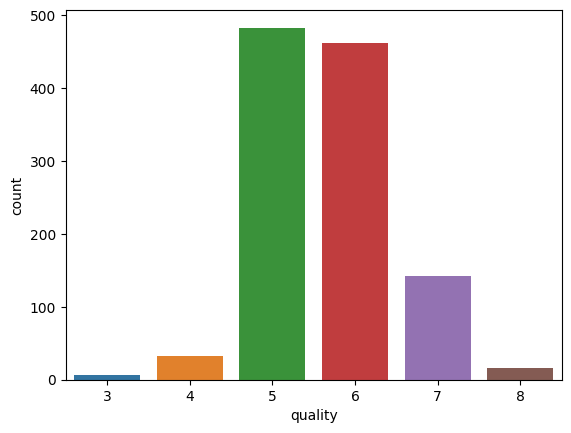

In [8]:
sns.countplot(x='quality', data= df)

In [9]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
print(iqr)

fixed acidity             2.000000
volatile acidity          0.247500
citric acid               0.330000
residual sugar            0.700000
chlorides                 0.020000
free sulfur dioxide      14.000000
total sulfur dioxide     40.000000
density                   0.002275
pH                        0.195000
sulphates                 0.180000
alcohol                   1.600000
quality                   1.000000
Id                      798.500000
dtype: float64


In [10]:
#The data point where we have false that means these values are valid whereas true indicates presence of an outlier
print(df < (q1-1.5*iqr)) | (df > (q3+1.5*iqr))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1138          False             False        False           False      False   
1139          False             False        False           False      False   
1140          False             False        False           False      False   
1141          False             False        False           False      False   
1142          False             False        False           False      False   

      free sulfur dioxide  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [11]:
df_out= df[~((df < (q1-1.5*iqr)) | (df > (q3+1.5*iqr))).any(axis=1)]
df_out.shape

(834, 13)

In [12]:
df_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [13]:
corre = df_out.corr()['quality'].drop('quality')
print(corre)

fixed acidity           0.117844
volatile acidity       -0.356948
citric acid             0.228060
residual sugar         -0.014981
chlorides              -0.190625
free sulfur dioxide    -0.001257
total sulfur dioxide   -0.209743
density                -0.208410
pH                     -0.042515
sulphates               0.417164
alcohol                 0.495364
Id                      0.120168
Name: quality, dtype: float64


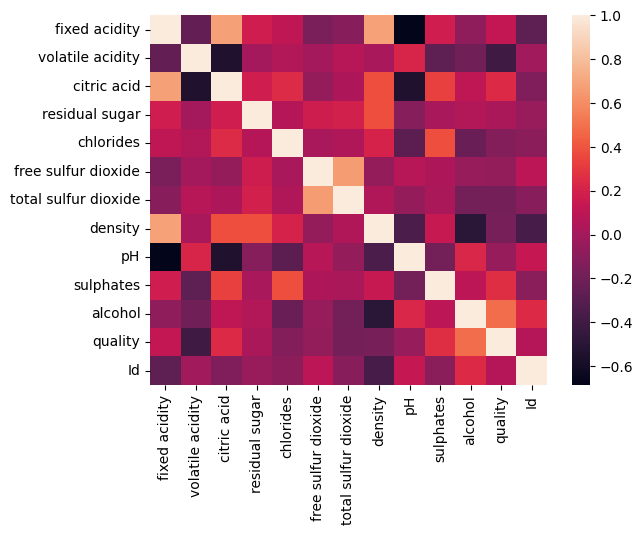

In [14]:
sns.heatmap(df.corr())
plt.show()

In [15]:
#impact of various factor on quality
corre.sort_values(ascending= False)

alcohol                 0.495364
sulphates               0.417164
citric acid             0.228060
Id                      0.120168
fixed acidity           0.117844
free sulfur dioxide    -0.001257
residual sugar         -0.014981
pH                     -0.042515
chlorides              -0.190625
density                -0.208410
total sulfur dioxide   -0.209743
volatile acidity       -0.356948
Name: quality, dtype: float64

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [17]:
y= df['quality']
x= df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2)

In [18]:
#model training

Ln = LinearRegression()
Ln.fit(x_train, y_train)

LinearRegression()

In [19]:
Ln.intercept_

23.976144356375293

In [20]:
train_pred= Ln.predict(x_train)
train_pred

array([5.24952024, 5.13479452, 5.84864628, 6.04981187, 5.90317011,
       6.13350167, 6.01237752, 5.90635772, 6.32611368, 4.88259475,
       5.37013383, 5.80016008, 5.91208605, 5.02398304, 6.50975591,
       5.03711254, 5.98221033, 6.0757296 , 5.33568799, 5.34062372,
       6.07429329, 5.39041497, 5.38963749, 5.82151886, 5.50813505,
       5.41256416, 5.14313617, 5.45621725, 4.79449014, 5.44363704,
       5.66100747, 5.42951209, 5.74989625, 5.08226202, 5.54095053,
       5.40722549, 5.95643012, 5.9743945 , 6.66676942, 5.92313465,
       5.46777163, 4.99349945, 5.08532372, 5.54343122, 5.89481307,
       6.18290046, 5.45381778, 6.25280193, 5.52045796, 5.28416768,
       5.02011521, 6.66180908, 6.50403755, 5.52389947, 5.24975922,
       5.07809663, 5.53207039, 6.13105958, 5.55926352, 5.84312948,
       6.13044651, 4.89081545, 6.44477484, 5.19143147, 5.18451357,
       6.22658435, 5.62074815, 5.61448412, 6.6332036 , 6.01475752,
       5.79704644, 5.64077378, 5.07809663, 5.55612453, 6.05266

In [21]:
test_pred= Ln.predict(x_test)
test_pred

array([5.63459566, 5.10086001, 6.1695179 , 6.00753929, 5.62658787,
       5.87142682, 5.77574998, 5.58307854, 6.38519311, 6.13800129,
       6.09535819, 6.45507582, 5.82859218, 5.15902624, 6.00384306,
       5.02762679, 5.61849348, 5.71048416, 5.02189803, 5.08356144,
       5.24760468, 5.42050532, 5.75247514, 5.64524027, 5.53880799,
       5.29501983, 5.72301526, 6.0238612 , 5.65629524, 5.84553725,
       7.56286682, 6.3779466 , 4.97506693, 5.63078788, 5.16918944,
       5.40470198, 5.84180245, 6.07895194, 5.5736557 , 5.13826804,
       5.22312469, 5.73817051, 5.2945106 , 5.22991101, 6.25688565,
       5.39183393, 4.89701018, 5.27057276, 5.47352339, 5.78783559,
       5.56795261, 5.8782221 , 5.08707519, 6.30004037, 5.16162734,
       6.46410655, 5.28520957, 5.57804473, 5.29603745, 5.85827463,
       4.86691186, 5.46482182, 5.50822344, 5.3489072 , 6.79311836,
       5.8765079 , 4.70638492, 5.06412611, 5.05021208, 5.25129427,
       6.63853119, 5.20074895, 6.07043319, 5.82459512, 6.40452

In [22]:
train_rmse= metrics.mean_squared_error(train_pred, y_train)**0.5
train_rmse

0.631495643372368

In [23]:
test_rmse= metrics.mean_squared_error(test_pred, y_test)**0.5
test_rmse

0.6644702603501813

In [24]:
#rounding off the predicted values for the test set
pred_data= np.round_(test_pred)
pred_data

array([6., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 5., 6., 5., 6.,
       6., 5., 5., 5., 5., 6., 6., 6., 5., 6., 6., 6., 6., 8., 6., 5., 6.,
       5., 5., 6., 6., 6., 5., 5., 6., 5., 5., 6., 5., 5., 5., 5., 6., 6.,
       6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 5., 6., 5., 7., 6., 5., 5.,
       5., 5., 7., 5., 6., 6., 6., 5., 5., 6., 5., 5., 5., 6., 6., 5., 6.,
       6., 6., 5., 6., 5., 7., 5., 7., 6., 5., 5., 7., 6., 5., 5., 5., 6.,
       6., 5., 5., 6., 7., 6., 6., 5., 5., 5., 6., 6., 5., 5., 6., 6., 5.,
       5., 5., 5., 5., 6., 5., 6., 5., 5., 5., 5., 6., 5., 6., 5., 6., 5.,
       5., 6., 6., 6., 7., 6., 5., 6., 6., 6., 6., 5., 7., 5., 5., 6., 5.,
       5., 5., 5., 5., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 6., 5., 5.,
       6., 6., 5., 7., 5., 6., 5., 7., 6., 5., 6., 5., 5., 5., 6., 6., 6.,
       6., 6., 6., 6., 6., 5., 5., 6., 6., 6., 5., 6., 5., 5., 5., 6., 5.,
       5., 5., 6., 6., 5., 5., 5., 6., 5., 5., 6., 7., 6., 5., 5., 7., 5.,
       5., 5., 6., 5., 5.

In [25]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, test_pred))
rmse= np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Root mean squared Error: ', rmse)

Mean Absolute Error:  0.49961916491448205
Mean Squared Error:  0.44152072688983773
Root mean squared Error:  0.6644702603501813


In [32]:
from sklearn.metrics import r2_score
print('Coefficient of determination: %.3f' % r2_score(y_test,test_pred))

Coefficient of determination: 0.388


Text(0.5, 1.0, 'RMSE_Score')

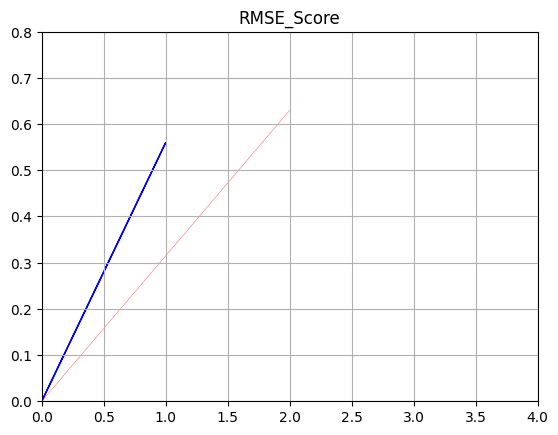

In [28]:
import matplotlib.pyplot as plt1
ax= plt1.axes()
col1= 'red'
col2= 'blue'
ax.arrow(0,0,1,0.56, head_width=0.00, head_length=0, fc=col2, ec=col2)
ax.arrow(0,0,2,0.63, head_width=0.00, head_length=0.05, fc=col1, ec=col1, linestyle=' ')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])
plt.grid()
plt.title('RMSE_Score')

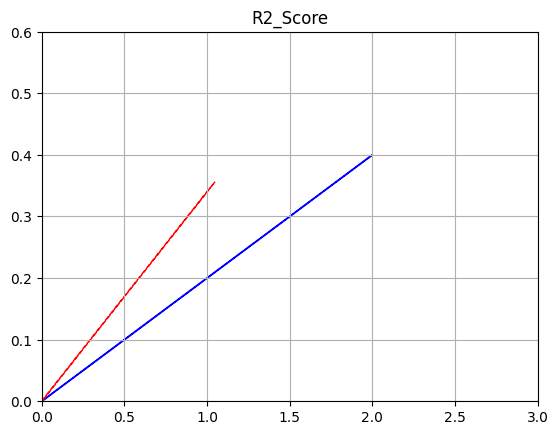

In [29]:
import matplotlib.pyplot as plt1
ax= plt1.axes()
col1= 'red'
col2= 'blue'
ax.arrow(0,0,2,0.40, head_width=0.00, head_length=0, fc=col2, ec=col2)
ax.arrow(0,0,1,0.34, head_width=0.00, head_length=0.05, fc=col1, ec=col1, linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('R2_Score')
plt1.show()